In [60]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

In [62]:
# Load the Boston Housing dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

In [64]:
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [66]:
# Standardize the features (but not the target)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [68]:
# Define the regression metrics display function
def regression_metrics_display(y_true, y_pred):
    print(f"MAE is {metrics.mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE is {metrics.mean_squared_error(y_true, y_pred):.2f}")
    print(f"R2 score is {metrics.r2_score(y_true, y_pred):.2f}")

In [70]:
# Build the Deep Neural Network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),  # 13 features
    tf.keras.layers.Dense(100, activation='relu', name='hidden-layer-1'),
    tf.keras.layers.BatchNormalization(name='batch-norm-1'),
    tf.keras.layers.Dense(50, activation='relu', name='hidden-layer-2'),
    tf.keras.layers.Dense(1, name='output-layer')  # No activation for linear regression
])

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [74]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_val_scaled, y_val), verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 552.4438 - mae: 21.8535 - val_loss: 546.9068 - val_mae: 21.6254
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 523.1930 - mae: 21.0705 - val_loss: 514.3019 - val_mae: 20.9898
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 439.9332 - mae: 19.2029 - val_loss: 475.3592 - val_mae: 20.1746
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 352.3448 - mae: 16.9639 - val_loss: 424.3941 - val_mae: 19.0412
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 263.8779 - mae: 14.5026 - val_loss: 367.5749 - val_mae: 17.6466
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 226.0791 - mae: 12.5555 - val_loss: 310.7610 - val_mae: 16.1147
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 149.6162 - mae: 10.1803 - val_loss: 256.6328 - val_mae: 14.4961
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 128.5876 - mae: 8.9814 - val_loss: 212.0771 - val_mae: 13.0419
Epoch 9/1

In [75]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\nTest Mean Absolute Error: {test_mae:.2f} thousand dollars")


Test Mean Absolute Error: 2.39 thousand dollars


In [78]:

# Make predictions
y_pred = model.predict(x_test_scaled, verbose=0).flatten()  # Flatten to match y_test shape


In [80]:
# Display regression metrics
print("\nRegression Metrics on Test Set:")
regression_metrics_display(y_test, y_pred)


Regression Metrics on Test Set:
MAE is 2.39
MSE is 11.71
R2 score is 0.84


In [82]:
# Print sample predictions
print("\nSample Predictions (Predicted vs Actual):")
for i in range(5):
    print(f"Sample {i+1}: Predicted = {y_pred[i]:.2f}, Actual = {y_test[i]:.2f}")


Sample Predictions (Predicted vs Actual):
Sample 1: Predicted = 20.72, Actual = 22.40
Sample 2: Predicted = 28.08, Actual = 28.60
Sample 3: Predicted = 17.65, Actual = 19.50
Sample 4: Predicted = 24.26, Actual = 24.80
Sample 5: Predicted = 23.64, Actual = 24.50


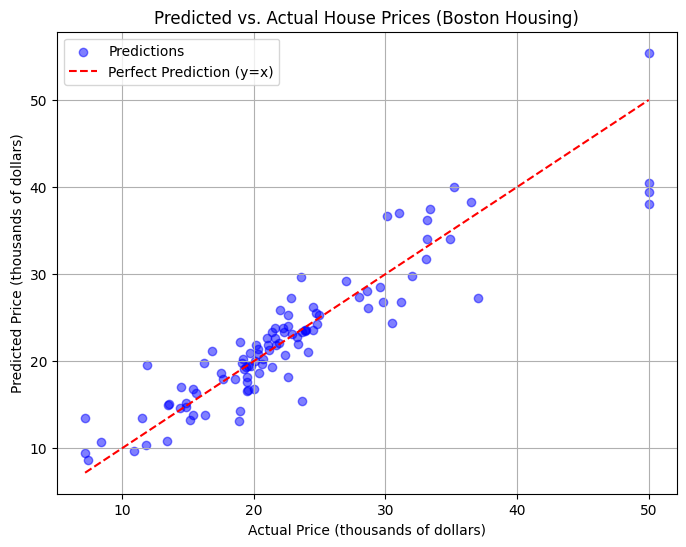

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are available from the DNN model
# If not, they can be generated using the previous code:
# y_pred = model.predict(x_test_scaled, verbose=0).flatten()

# Scatter Plot: Predicted vs. Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Price (thousands of dollars)')
plt.ylabel('Predicted Price (thousands of dollars)')
plt.title('Predicted vs. Actual House Prices (Boston Housing)')
plt.legend()
plt.grid(True)
plt.show()


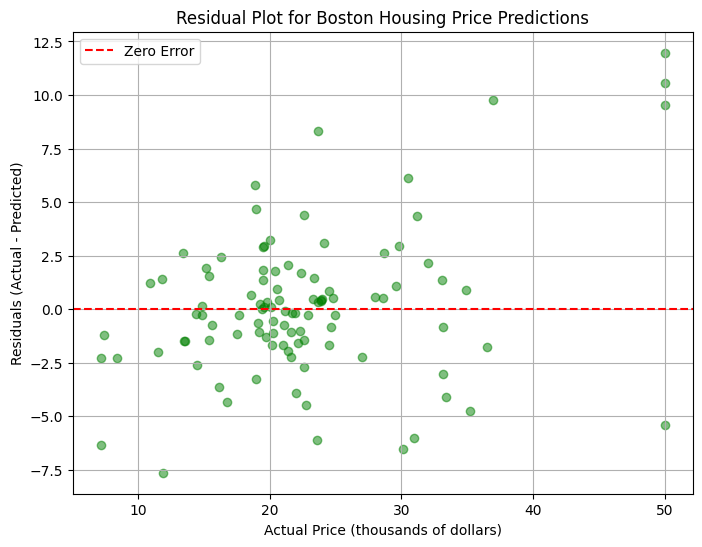

In [86]:
# Residual Plot: Errors vs. Actual Prices
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Actual Price (thousands of dollars)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Boston Housing Price Predictions')
plt.legend()
plt.grid(True)
plt.show()